# Analysis Challenge Assignment #3

**Author:** Nikita Tejwani

Students in the United States who have High School Equivalency (HSE) diplomas are less likely to enroll in college than those who have obtained high school diplomas, according to a 2011 NCES Information Brief.  The former group faces higher access barriers to educational institutions, including time, cost, and less accessible informational resources.  Furthermore, when HSE diploma holders do enroll in college, they are likely to only stay enrolled for one semester.

To improve outcomes for HSE diploma holders, it will be helpful for students to be able to differentiate between colleges that will make good use of their money and those that will not.  This distinction is especially imperative given the prevalence of institutions like University of Phoenix which have a reputation for preying on low-income, uninformed students who have experienced a gap in their education.

The institutions in the College Scoreboard will be divided into four groups based on cost (C) and probability of graduation (G): high C + high G, high C + low G, low C + high G, low C + low G.

### **Reference:**

https://nces.ed.gov/pubs2012/2012025.pdf

In [1]:
#Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Import College Scorecard dataset 
pd.set_option('display.max_columns', None)
df = pd.read_csv('CollegeScorecard.csv')
df = df[['UNITID', 'NPT4_048_PUB', 'NPT4_048_PRIV', 'C150_4', 'C150_L4']] #Only keep columns UNITID, tuition, and graduation rate
df = df.astype('float64')
df.set_index('UNITID', inplace = True)
df.dropna(thresh = 2, axis = 0, inplace = True)

C:\Users\Niki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#The pairs of columns NPT4_048_PUB + NPT4_048_PRIV, and C150_4 + C150_L4 are mutually exclusive
#Each pair is combined to make the variables AttendanceCost and GraduationRate respectively
df.fillna(0, inplace = True)
df['AttendanceCost'] = df['NPT4_048_PUB'] + df['NPT4_048_PRIV']
df['GraduationRate'] = df['C150_4'] + df['C150_L4']
df.drop(['NPT4_048_PUB', 'NPT4_048_PRIV', 'C150_4', 'C150_L4'], inplace = True, axis = 1)

<AxesSubplot:title={'center':'Cost and Graduation Rates of US Colleges'}, xlabel='AttendanceCost', ylabel='GraduationRate'>

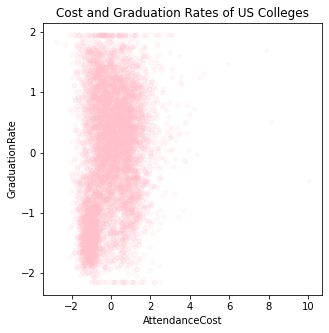

In [4]:
#Standardize and plot the data
df = (df - df.mean()) / (df.std())
df.plot.scatter('AttendanceCost', 'GraduationRate', title  = 'Cost and Graduation Rates of US Colleges', 
                c = 'pink', alpha = 0.1, figsize = (5, 5))

In [5]:
#Use k-means clustering to split the dataset into four clusters, ideally based on low/high cost and low/high graduation rate
kmeans = KMeans(n_clusters = 4, algorithm = 'elkan')
kmeans.fit(df)
cluster_kmeans = kmeans.predict(df)

# Why cluster the data?

The data will be separated into four clusters that will form a sort of confusion matrix.  Along the x axis, data is sorted into high and low attendance costs.  Along the y axis, data is sorted into high and low graduation rates.

Students can limit their college search space according to these categories.  In general, it is likely unwise for students to attend a school with a high cost and a low graduation rate.  Students who hold HSE diplomas specifically should avoid schools with low graduation rates, regardless of cost.  Enrolling in an institution with a low graduation rate would result in a higher probability that the student does not complete the program - an event that is already fairly likely among HSE diploma holders.  Finally, low-income HSE diploma holders can be encouraged to prioritize schools with a low cost and a high graduation rate.

Text(0, 0.5, 'Graduation Rate')

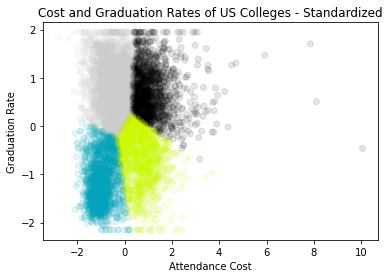

In [6]:
#Plot the four clusters according to relative cost and graduation rate
attendance_cost = df['AttendanceCost'].values.reshape(-1, 1)
graduation_rate = df['GraduationRate'].values.reshape(-1, 1)
plt.scatter(attendance_cost, graduation_rate, c = cluster_kmeans, cmap = 'nipy_spectral', alpha = 0.1)
plt.title('Cost and Graduation Rates of US Colleges - Standardized')
plt.xlabel('Attendance Cost')
plt.ylabel('Graduation Rate')
#Top left cluster - low cost, high graduation rate
#Bottom left cluster - low cost, low graduation rate
#Top right cluster - high cost, high graduation rate
#Bottom right cluster - high cost, low graduation rate

In [7]:
#Add the cluster number to the dataset
#Cluster 0 - high cost, low graduation rate
#Cluster 1 - low cost, low graduation rate
#Cluster 2 - low cost, high graduation rate
#Cluster 3 - high cost, high graduation rate

df['cluster'] = cluster_kmeans
df.drop(['AttendanceCost', 'GraduationRate'], axis = 1, inplace = True)

In [8]:
#Create a new dataframe in which the columns are the cluster names

#Create a series for each cluster name
df.reset_index(inplace = True)
column0 = df.UNITID[df['cluster'] == 0]
column0.reset_index(drop = True, inplace = True)

column1 = df.UNITID[df['cluster'] == 1]
column1.reset_index(drop = True, inplace = True)

column2 = df.UNITID[df['cluster'] == 2]
column2.reset_index(drop = True, inplace = True)

column3 = df.UNITID[df['cluster'] == 3]
column3.reset_index(drop = True, inplace = True)

#Add each series as a single column for the final dataframe
df_final = pd.DataFrame()
df_final = pd.concat([column0, column1, column2, column3], ignore_index = True, axis = 1)
df_final = df_final.rename({0:'HighCostLowGraduation', 1:'LowCostLowGraduation', 2:'LowCostHighGraduation', 3:'HighCostHighGraduation'}, axis = 'columns', errors = 'raise')

In [9]:
#Finalize csv file with college unit IDs sorted by the specified categories
df_final.to_csv('SortedCollegeIDs.csv', index = False)

# List of college Unit IDs sorted by cost and graduation rate

Fun fact, Columbia University is among the colleges with a high cost and high graudation rate.

In [10]:
np.set_printoptions(threshold = 3000, linewidth = 95)
print("High Cost, Low Graduation:", column0.to_numpy())
print('\n')
print("Low Cost, Low Graduation:", column1.to_numpy())
print('\n')
print("Low Cost, High Graduation:", column2.to_numpy())
print('\n')
print("High Cost, High Graduation:", column3.to_numpy())

High Cost, Low Graduation: [100751. 102049. 103811. 103893. 103909. 103927. 103963. 104188. 104504. 104586. 104805.
 105118. 105215. 105534. 105659. 105677. 105987. 106041. 107044. 107080. 107789. 108348.
 108852. 109040. 109332. 109651. 109721. 109730. 109785. 109934. 110097. 110194. 110361.
 110370. 110413. 110945. 111009. 111081. 111638. 111948. 112075. 112288. 112446. 113582.
 113698. 114044. 114354. 114390. 114415. 114947. 115010. 115931. 116563. 116846. 117168.
 117946. 118189. 118259. 118277. 118286. 118888. 118921. 118967. 119173. 119234. 119270.
 119340. 119359. 119368. 119438. 119456. 119465. 119508. 119553. 120069. 120078. 120087.
 120403. 120661. 120838. 120883. 121150. 121275. 121309. 121381. 121691. 122366. 122436.
 122506. 122612. 122834. 122931. 123165. 123208. 123554. 123581. 123679. 123952. 124292.
 124681. 124706. 124937. 125727. 126775. 127060. 127945. 128498. 128674. 128726. 128896.
 129002. 129242. 129349. 129525. 129686. 129923. 129941. 129969. 130174. 130183. 13